****Character interaction in GOT books****

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd #data manipulation

mpl_params = {
    "axes.titlesize": 20,
    "figure.figsize": (12, 4),
}
plt.rcParams.update(mpl_params)

In [ ]:
books_df=pd.read_csv("/content/book.csv")
books_df.head()

Source              Target  ... weight  book
0                   Addam-Marbrand     Jaime-Lannister  ...      3     1
1                   Addam-Marbrand     Tywin-Lannister  ...      6     1
2                Aegon-I-Targaryen  Daenerys-Targaryen  ...      5     1
3                Aegon-I-Targaryen        Eddard-Stark  ...      4     1
4  Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  ...      4     1

[5 rows x 5 columns]

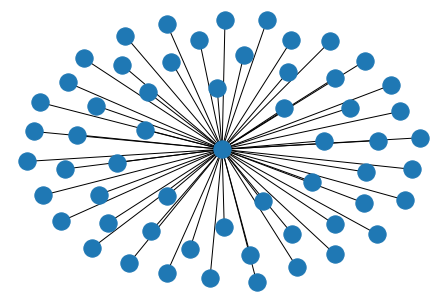

In [ ]:
#edge weight visulaisation
books_graph=nx.from_pandas_edgelist(books_df, 'book', 'weight')
nx.draw(books_graph)

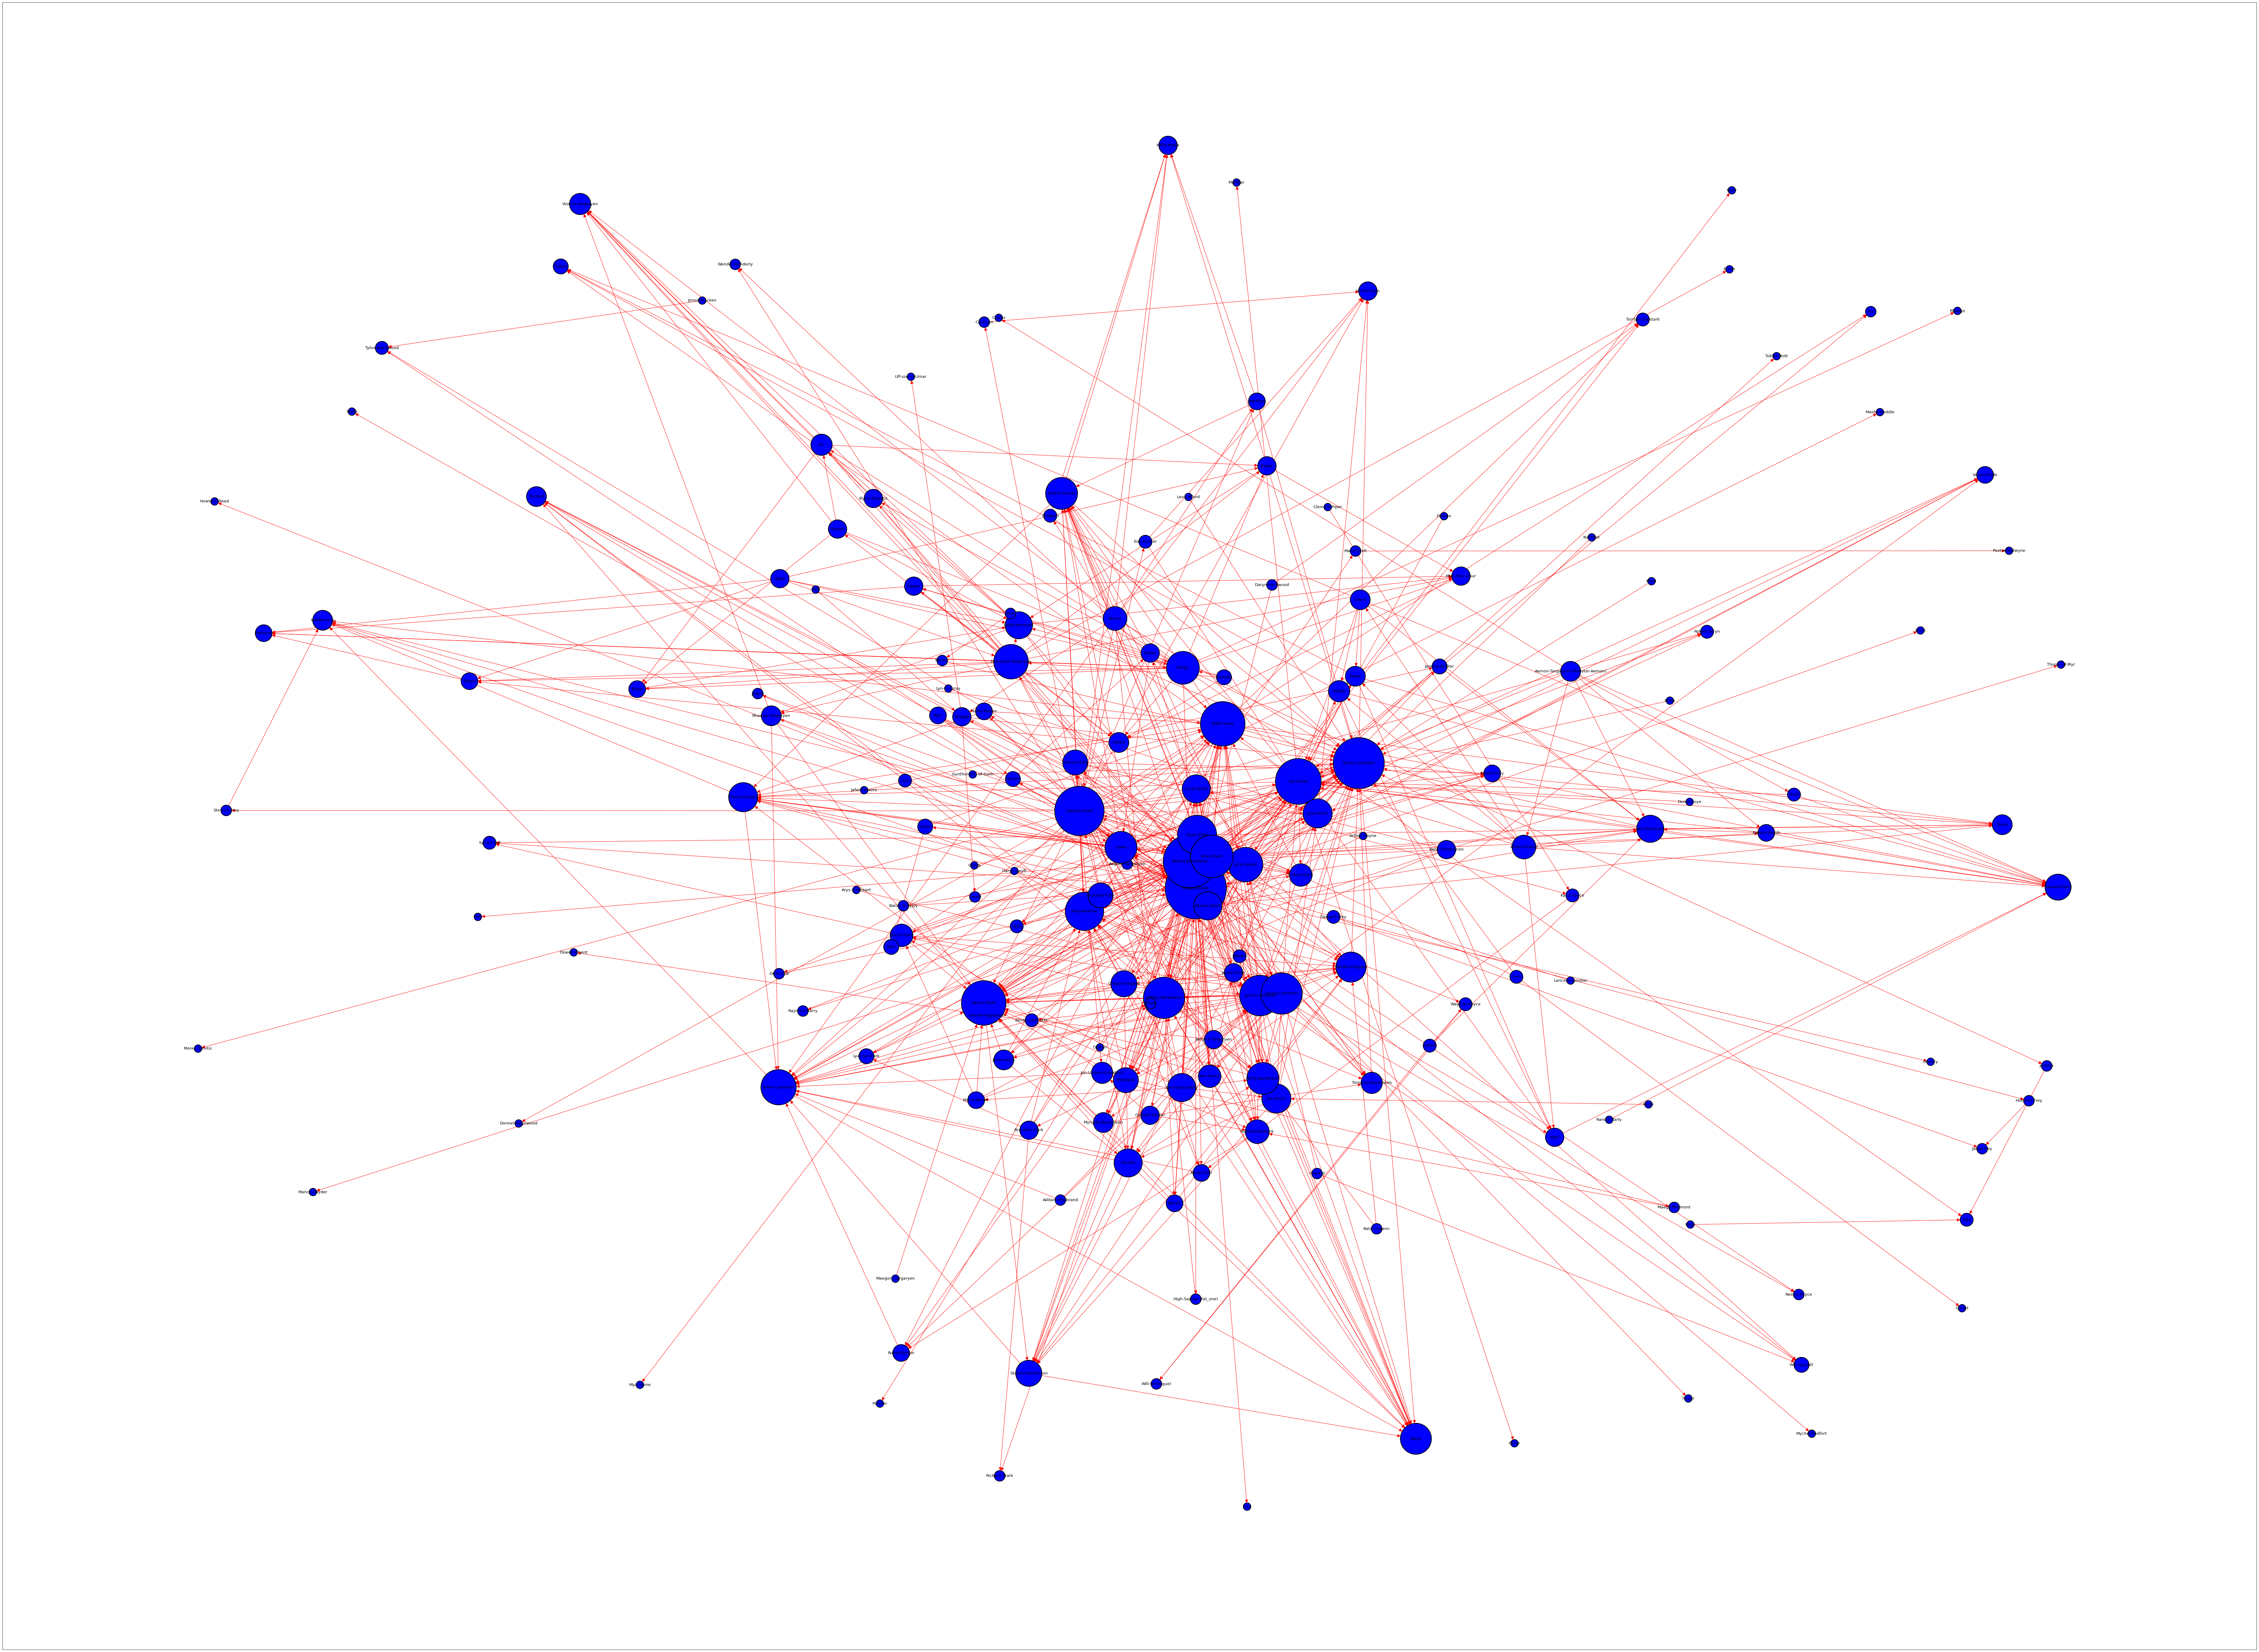

In [ ]:
#creating multigraph network with nodes sized in proportion to degree centrality.
Books_graph = nx.from_pandas_edgelist(books_df, source='Source', target='Target', 
                                      create_using=nx.MultiDiGraph())
# Computing node degrees,
node_degree = nx.degree(Books_graph)

#graph visualization
layout = nx.spring_layout(Books_graph, k=0.15, iterations=20)
plt.figure(num=None, figsize=(120, 90), dpi=80)
nx.draw_networkx(
        Books_graph,
        node_size=[int(degree[1]) * 500 for degree in node_degree],
        arrowsize=20,
        linewidths=2,
        pos=layout,
        edge_color='red',
        edgecolors='black',
        node_color='blue',
    )

In [ ]:
#degree computation
Degree_view=pd.DataFrame(node_degree)
Degree_view.head()

0   1
0      Addam-Marbrand   2
1     Jaime-Lannister  29
2     Tywin-Lannister  22
3   Aegon-I-Targaryen   2
4  Daenerys-Targaryen  21

**NEW_Books_section Graph**

In [ ]:
import pandas as pd
import networkx as nx

In [ ]:
New_books_df=pd.read_csv("/content/book.csv")
New_books_df['weight_inv'] = 1/New_books_df.weight
#interaction b/w characters 
r_stark_df = (
 New_books_df.query("weight >=22")
 .query("Source == 'Robb-Stark'or Target == 'Robb-Stark'")
)
r_stark_df.info()
r_stark_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 134 to 637
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Source      4 non-null      object 
 1   Target      4 non-null      object 
 2   Type        4 non-null      object 
 3   weight      4 non-null      int64  
 4   book        4 non-null      int64  
 5   weight_inv  4 non-null      float64
dtypes: float64(1), int64(2), object(3)
memory usage: 224.0+ bytes


Source         Target        Type  weight  book  weight_inv
134     Bran-Stark     Robb-Stark  Undirected     112     1    0.008929
193  Catelyn-Stark     Robb-Stark  Undirected      49     1    0.020408
501       Jon-Snow     Robb-Stark  Undirected      53     1    0.018868
637     Robb-Stark  Theon-Greyjoy  Undirected      37     1    0.027027

In [ ]:
New_books_df.head()

Source              Target  ... book  weight_inv
0                   Addam-Marbrand     Jaime-Lannister  ...    1    0.333333
1                   Addam-Marbrand     Tywin-Lannister  ...    1    0.166667
2                Aegon-I-Targaryen  Daenerys-Targaryen  ...    1    0.200000
3                Aegon-I-Targaryen        Eddard-Stark  ...    1    0.250000
4  Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  ...    1    0.250000

[5 rows x 6 columns]

In [ ]:
g_characters = [nx.from_pandas_edgelist(
          New_books_df[New_books_df.book==i],
          source='Source', target='Target',
          edge_attr=['weight', 'weight_inv'])
             for i in range(1, 6)]

In [ ]:
g_characters[0:]

In [ ]:
relation_val = list(g_characters[0].edges(data=True))
relation_val[0:3]

[('Addam-Marbrand',
  'Jaime-Lannister',
  {'weight': 3, 'weight_inv': 0.3333333333333333}),
 ('Addam-Marbrand',
  'Tywin-Lannister',
  {'weight': 6, 'weight_inv': 0.16666666666666666}),
 ('Jaime-Lannister', 'Aerys-II-Targaryen', {'weight': 5, 'weight_inv': 0.2})]

In [ ]:
# connected neighbours-
cen_list={}
for i in range(4):
  cen_list[i] = nx.degree_centrality(g_characters[i])


In [ ]:
cen_list.values()

dict_values([{'Addam-Marbrand': 0.010752688172043012, 'Jaime-Lannister': 0.15591397849462366, 'Tywin-Lannister': 0.11827956989247312, 'Aegon-I-Targaryen': 0.010752688172043012, 'Daenerys-Targaryen': 0.11290322580645162, 'Eddard-Stark': 0.3548387096774194, 'Aemon-Targaryen-(Maester-Aemon)': 0.03763440860215054, 'Alliser-Thorne': 0.05376344086021506, 'Bowen-Marsh': 0.02688172043010753, 'Chett': 0.016129032258064516, 'Clydas': 0.005376344086021506, 'Jeor-Mormont': 0.06989247311827958, 'Jon-Snow': 0.19892473118279572, 'Samwell-Tarly': 0.06451612903225806, 'Aerys-II-Targaryen': 0.03225806451612903, 'Brandon-Stark': 0.03225806451612903, 'Gerold-Hightower': 0.02688172043010753, 'Jon-Arryn': 0.08064516129032259, 'Robert-Baratheon': 0.2688172043010753, 'Aggo': 0.03225806451612903, 'Drogo': 0.10215053763440861, 'Jhogo': 0.03225806451612903, 'Jorah-Mormont': 0.06989247311827958, 'Quaro': 0.02688172043010753, 'Rakharo': 0.02688172043010753, 'Albett': 0.016129032258064516, 'Halder': 0.0430107526881

In [ ]:
deg_cen_book1 = nx.degree_centrality(g_characters[0])

In [ ]:
deg_cen_book1['Bran-Stark']

0.17204301075268819

In [ ]:
#top 10 characters in books-
sorted(deg_cen_book1.items(),
       key=lambda x:x[1],
       reverse=True)[0:10]

[('Eddard-Stark', 0.3548387096774194),
 ('Robert-Baratheon', 0.2688172043010753),
 ('Tyrion-Lannister', 0.24731182795698928),
 ('Catelyn-Stark', 0.23118279569892475),
 ('Jon-Snow', 0.19892473118279572),
 ('Robb-Stark', 0.18817204301075272),
 ('Sansa-Stark', 0.18817204301075272),
 ('Bran-Stark', 0.17204301075268819),
 ('Cersei-Lannister', 0.16129032258064518),
 ('Joffrey-Baratheon', 0.16129032258064518)]

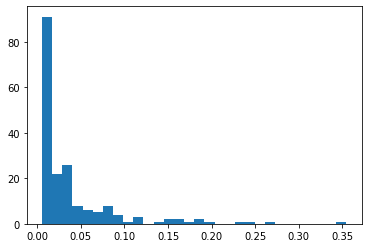

In [ ]:
#centrality list visualization
import matplotlib.pyplot as plt
plt.hist(cen_list[0].values(), bins=30)
plt.show()

In [ ]:
import weighted_degree
list(weighted_degree(g_characters[0], 'weight').values(),bin=30)

ModuleNotFoundError: ignored

**Starting with Tesla stocks data**

In [ ]:
df=pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/TSLA?period1=1593701871&period2=1625237871&interval=1d&events=history&includeAdjustedClose=true")
df.info

In [ ]:
G = nx.from_pandas_edgelist(df, 'Low', 'Volume')
nx.draw(G)

In [ ]:
nx.draw(G)
plt.show()